<a href="https://colab.research.google.com/github/psam96/state_map/blob/main/visited_states_us.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Creates state map of US.
Colors the visited states in different years.
"""

In [ ]:
# Install the required packages
!pip install geopandas
!pip install geodatasets

In [ ]:
# Import required packages
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import geopandas
import os

os.environ["SHAPE_RESTORE_SHX"] = "YES"

In [ ]:
# Load the shape file
# Make sure to use the correct file path
states = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/data/shape_files/States_shapefile.shp")

# Remove Alaska and Hawai from the map
states_small = states[(states.State_Name != "ALASKA") & (states.State_Name != "HAWAII")]


# View the edited map
# Confirm the name of headers and if the states have been removed
states_small


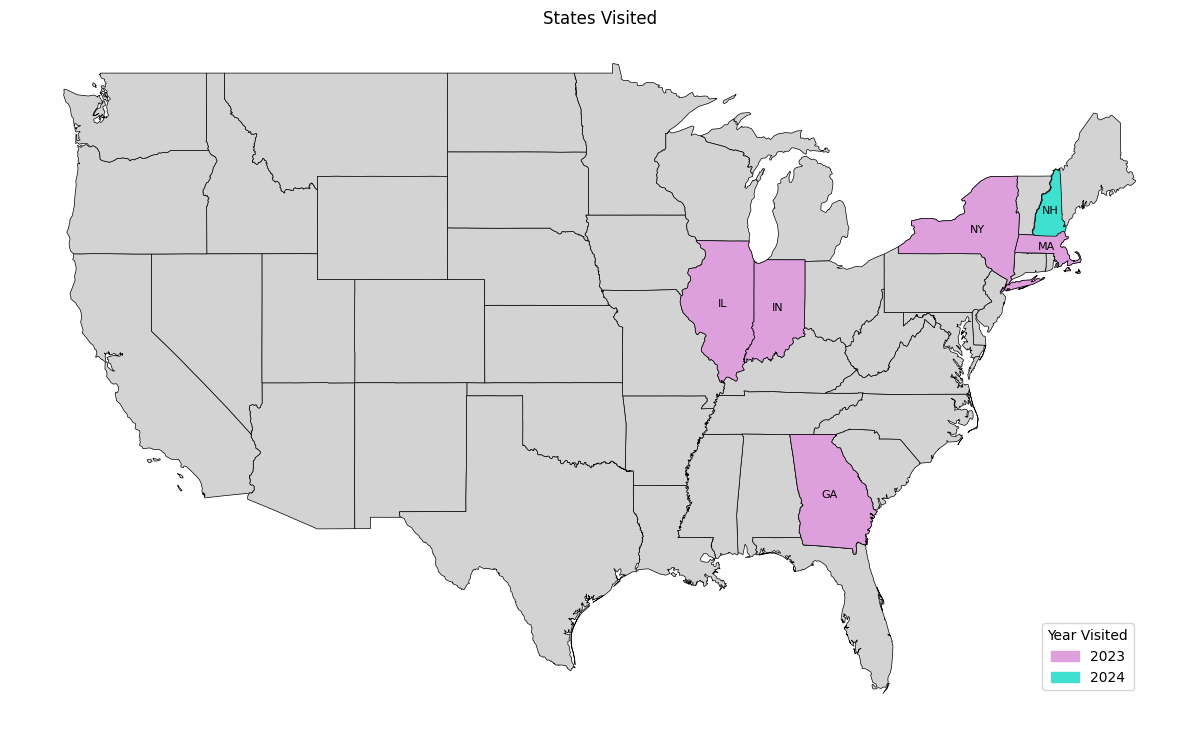

In [ ]:
# Dictionary of visited states
visited_states_2023 = ["INDIANA", "GEORGIA", "MASSACHUSETTS", "ILLINOIS", "NEW YORK"]
visited_states_2024 = ["NEW HAMPSHIRE"]

# Plot the entire map
fig, ax = plt.subplots(1,1, figsize = (16,9))
states_small.plot(ax = ax, edgecolor = "Black", linewidth = 0.5, facecolor = "lightgray")


# Plot visited states in 2023 over the entire map
visited_2023 = states[states.State_Name.isin(visited_states_2023)]
visited_2023.plot(ax = ax, edgecolor = "Black", linewidth = 0.5, facecolor = "plum", label = "Year 2023")

# Plot visited states in 2024 over the entire map
visited_2024 = states[states.State_Name.isin(visited_states_2024)]
visited_2024.plot(ax = ax, edgecolor = "Black", linewidth = 0.5, facecolor = "turquoise", label = "Year 2024")

# Making a single list for visited states
visited_list = [visited_2023, visited_2024]

# Show state names for visited states
for visited_year in visited_list:
    for idx, row in visited_year.iterrows():
        centroid = row.geometry.centroid
        ax.text(centroid.x, centroid.y, row["State_Code"], fontsize=8, ha='center', va='center')

# Create cutom legend using Patch
handles = [Patch(color = "plum"), Patch(color = "turquoise")]
labels = ["2023", "2024"]

# Show the custom legend
ax.legend(handles, labels, title = "Year Visited", loc = [0.875, 0.05])

# Give title
ax.set_title("States Visited")
ax.set_axis_off()

# Save the map
plt.savefig("map_us.png", dpi = 300, bbox_inches = None)

# Show the map
plt.show()